##Importing Libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scipy import stats
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

##Data Collection

In [35]:
data = pd.read_csv('/content/train.csv')
stores = pd.read_csv('/content/stores.csv')
features = pd.read_csv('/content/features.csv')

In [36]:
data.shape

(421570, 5)

In [37]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [38]:
data.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [40]:
stores.shape

(45, 3)

In [41]:
stores.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [42]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [43]:
features.shape

(8190, 12)

In [44]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [45]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


##Data Pre_Processing

In [46]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [47]:
features.MarkDown1 = features.MarkDown1.fillna(value=features.MarkDown1.median())
features.MarkDown2 = features.MarkDown2.fillna(value=features.MarkDown2.median())
features.MarkDown3 = features.MarkDown3.fillna(value=features.MarkDown3.median())
features.MarkDown4 = features.MarkDown4.fillna(value=features.MarkDown4.median())
features.MarkDown5 = features.MarkDown5.fillna(value=features.MarkDown5.median())
features.CPI = features.CPI.fillna(value=features.CPI.median())
features.Unemployment = features.Unemployment.fillna(value=features.Unemployment.median())

In [48]:
features.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [49]:
data = pd.merge(data,stores,on='Store',how='left')

In [50]:
data = pd.merge(data,features,on=['Store','Date'],how='left')

In [51]:
data['Date'] = pd.to_datetime(data['Date'])

In [52]:
data.sort_values(by=['Date'],inplace=True)

In [53]:
data.set_index(data.Date, inplace=True)

In [54]:
data['IsHoliday_x'].isin(data['IsHoliday_y']).all()

True

In [55]:
data.drop(columns='IsHoliday_x',inplace=True)
data.rename(columns={"IsHoliday_y" : "IsHoliday"}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Type          421570 non-null  object        
 5   Size          421570 non-null  int64         
 6   Temperature   421570 non-null  float64       
 7   Fuel_Price    421570 non-null  float64       
 8   MarkDown1     421570 non-null  float64       
 9   MarkDown2     421570 non-null  float64       
 10  MarkDown3     421570 non-null  float64       
 11  MarkDown4     421570 non-null  float64       
 12  MarkDown5     421570 non-null  float64       
 13  CPI           421570 non-null  float64       
 14  Unemployment  421570 non-null  float64       
 15  I

In [56]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,4743.58,364.57,36.26,1176.425,2727.135,211.096358,8.106,False
2010-02-05,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,4743.58,364.57,36.26,1176.425,2727.135,131.527903,10.064,False
2010-02-05,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,4743.58,364.57,36.26,1176.425,2727.135,131.527903,10.064,False
2010-02-05,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,4743.58,364.57,36.26,1176.425,2727.135,131.527903,10.064,False
2010-02-05,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,4743.58,364.57,36.26,1176.425,2727.135,131.527903,10.064,False


In [57]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

In [58]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month
Date,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,4743.58,364.57,36.26,1176.425,2727.135,211.096358,8.106,False,2010,2
2010-02-05,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,4743.58,364.57,36.26,1176.425,2727.135,131.527903,10.064,False,2010,2
2010-02-05,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,4743.58,364.57,36.26,1176.425,2727.135,131.527903,10.064,False,2010,2
2010-02-05,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,4743.58,364.57,36.26,1176.425,2727.135,131.527903,10.064,False,2010,2
2010-02-05,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,4743.58,364.57,36.26,1176.425,2727.135,131.527903,10.064,False,2010,2


In [59]:
agg_data = data.groupby(['Store', 'Dept']).Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()
agg_data.isnull().sum()

Store      0
Dept       0
max        0
min        0
mean       0
median     0
std       37
dtype: int64

In [60]:
store_data = pd.merge(left=data,right=agg_data,on=['Store', 'Dept'],how ='left')
store_data.dropna(inplace=True)
data = store_data.copy()
del store_data

In [61]:
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by=['Date'],inplace=True)
data.set_index(data.Date, inplace=True)
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,CPI,Unemployment,IsHoliday,Year,Month,max,min,mean,median,std
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,4743.58,364.57,...,211.096358,8.106,False,2010,2,57592.12,14537.37,22513.322937,18535.48,9854.349032
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,4743.58,364.57,...,214.655459,6.415,False,2010,2,766.93,-9.92,372.655556,371.05,290.954675
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,4743.58,364.57,...,214.655459,6.415,False,2010,2,2512.14,110.56,876.629441,824.04,307.436056
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,4743.58,364.57,...,214.471451,6.299,False,2010,2,11990.43,7414.43,9188.915105,9161.97,756.223236
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,4743.58,364.57,...,214.655459,6.415,False,2010,2,29166.26,4791.74,8607.050490,7571.60,3874.176095


In [62]:
data['Total_MarkDown'] = data['MarkDown1']+data['MarkDown2']+data['MarkDown3']+data['MarkDown4']+data['MarkDown5']
data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)

In [63]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,False,2010,2,57592.12,14537.37,22513.322937,18535.48,9854.349032,9047.97
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,214.655459,6.415,False,2010,2,766.93,-9.92,372.655556,371.05,290.954675,9047.97
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,214.655459,6.415,False,2010,2,2512.14,110.56,876.629441,824.04,307.436056,9047.97
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,214.471451,6.299,False,2010,2,11990.43,7414.43,9188.915105,9161.97,756.223236,9047.97
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,214.655459,6.415,False,2010,2,29166.26,4791.74,8607.050490,7571.60,3874.176095,9047.97


In [64]:
numeric_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown']
data_numeric = data[numeric_col].copy()

In [65]:
data.shape

(421533, 19)

In [66]:
data = data[(np.abs(stats.zscore(data_numeric)) < 2.5).all(axis = 1)]
data.shape

(375507, 19)

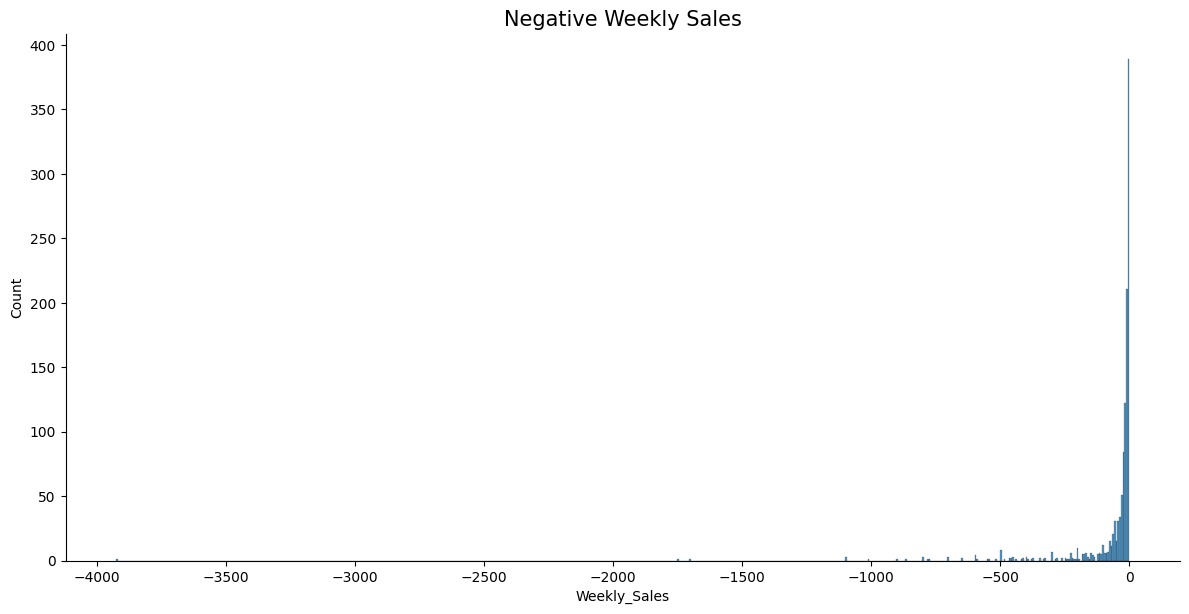

In [67]:
y = data["Weekly_Sales"][data.Weekly_Sales < 0]
sns.displot(y,height=6,aspect=2)
plt.title("Negative Weekly Sales", fontsize=15)
plt.show()

In [68]:
data=data[data['Weekly_Sales']>=0]

In [69]:
data.shape

(374316, 19)

In [70]:
data['IsHoliday'] = data['IsHoliday'].astype('int')
data

<ipython-input-70-2fd6f7315588>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['IsHoliday'] = data['IsHoliday'].astype('int')


,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,57592.12,14537.37,22513.322937,18535.480,9854.349032,9047.970
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,766.93,-9.92,372.655556,371.050,290.954675,9047.970
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,2512.14,110.56,876.629441,824.040,307.436056,9047.970
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,214.471451,6.299,0,2010,2,11990.43,7414.43,9188.915105,9161.970,756.223236,9047.970
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,29166.26,4791.74,8607.050490,7571.600,3874.176095,9047.970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,2,26,2012-10-26,9258.88,A,202307,69.79,3.506,223.078337,6.170,0,2012,10,19679.04,4179.99,9347.725105,8762.990,2825.107609,9678.800
2012-10-26,38,23,2012-10-26,53.12,C,39690,65.95,4.301,131.193097,10.199,0,2012,10,289.78,3.50,37.848679,31.365,34.065601,1679.305
2012-10-26,27,6,2012-10-26,5339.65,A,204184,58.99,4.071,142.762411,8.000,0,2012,10,41005.33,2524.01,7730.729091,6798.780,5178.928257,10969.270


##Data Visualization

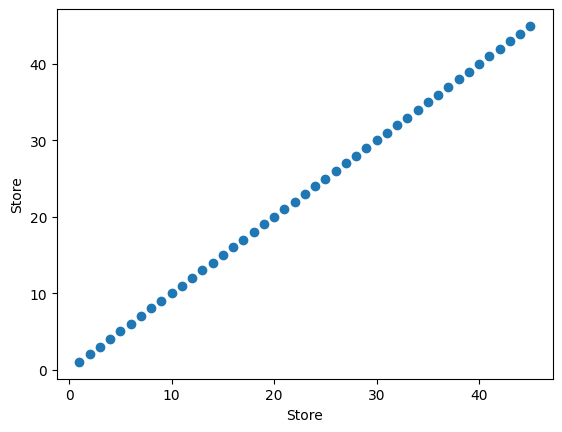

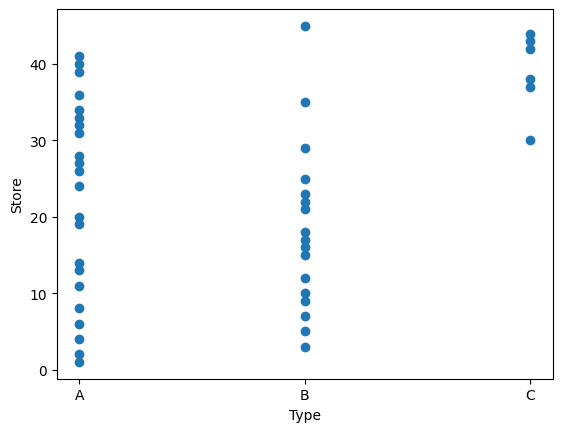

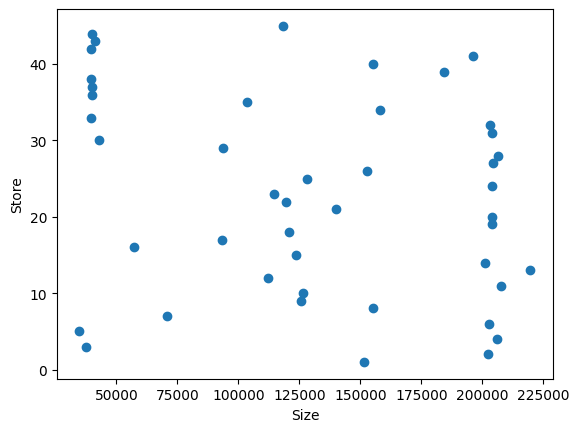

In [71]:
for i in stores.columns:
  plt.scatter(stores[i],stores['Store'])
  plt.xlabel(i)
  plt.ylabel("Store")
  plt.show()

<Axes: xlabel='Store', ylabel='Unemployment'>

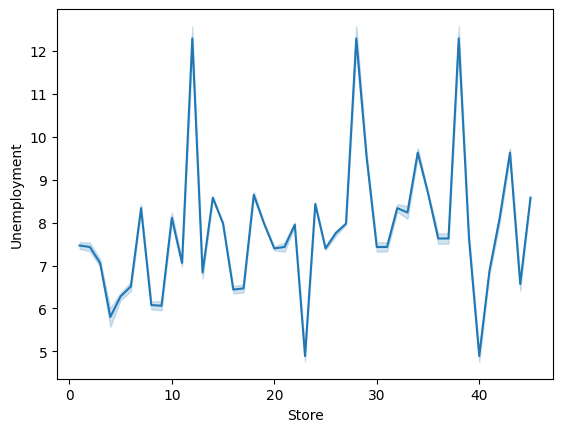

In [72]:
sns.lineplot(x=features.Store,y=features.Unemployment)

<Axes: xlabel='Store', ylabel='Unemployment'>

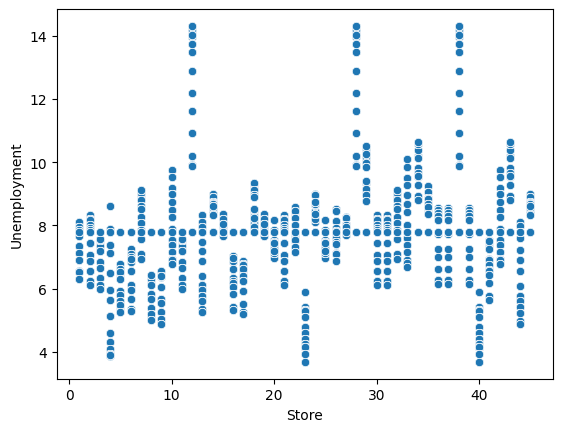

In [73]:
sns.scatterplot(x=features.Store,y=features.Unemployment)

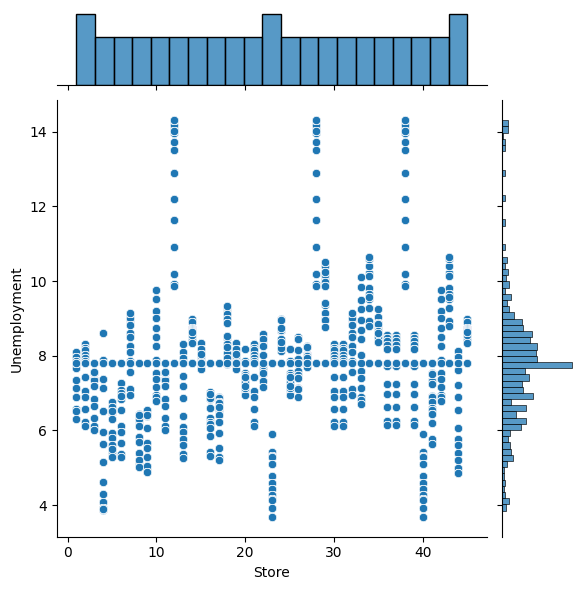

In [74]:
sns.jointplot(x='Store',y='Unemployment',data=features)

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


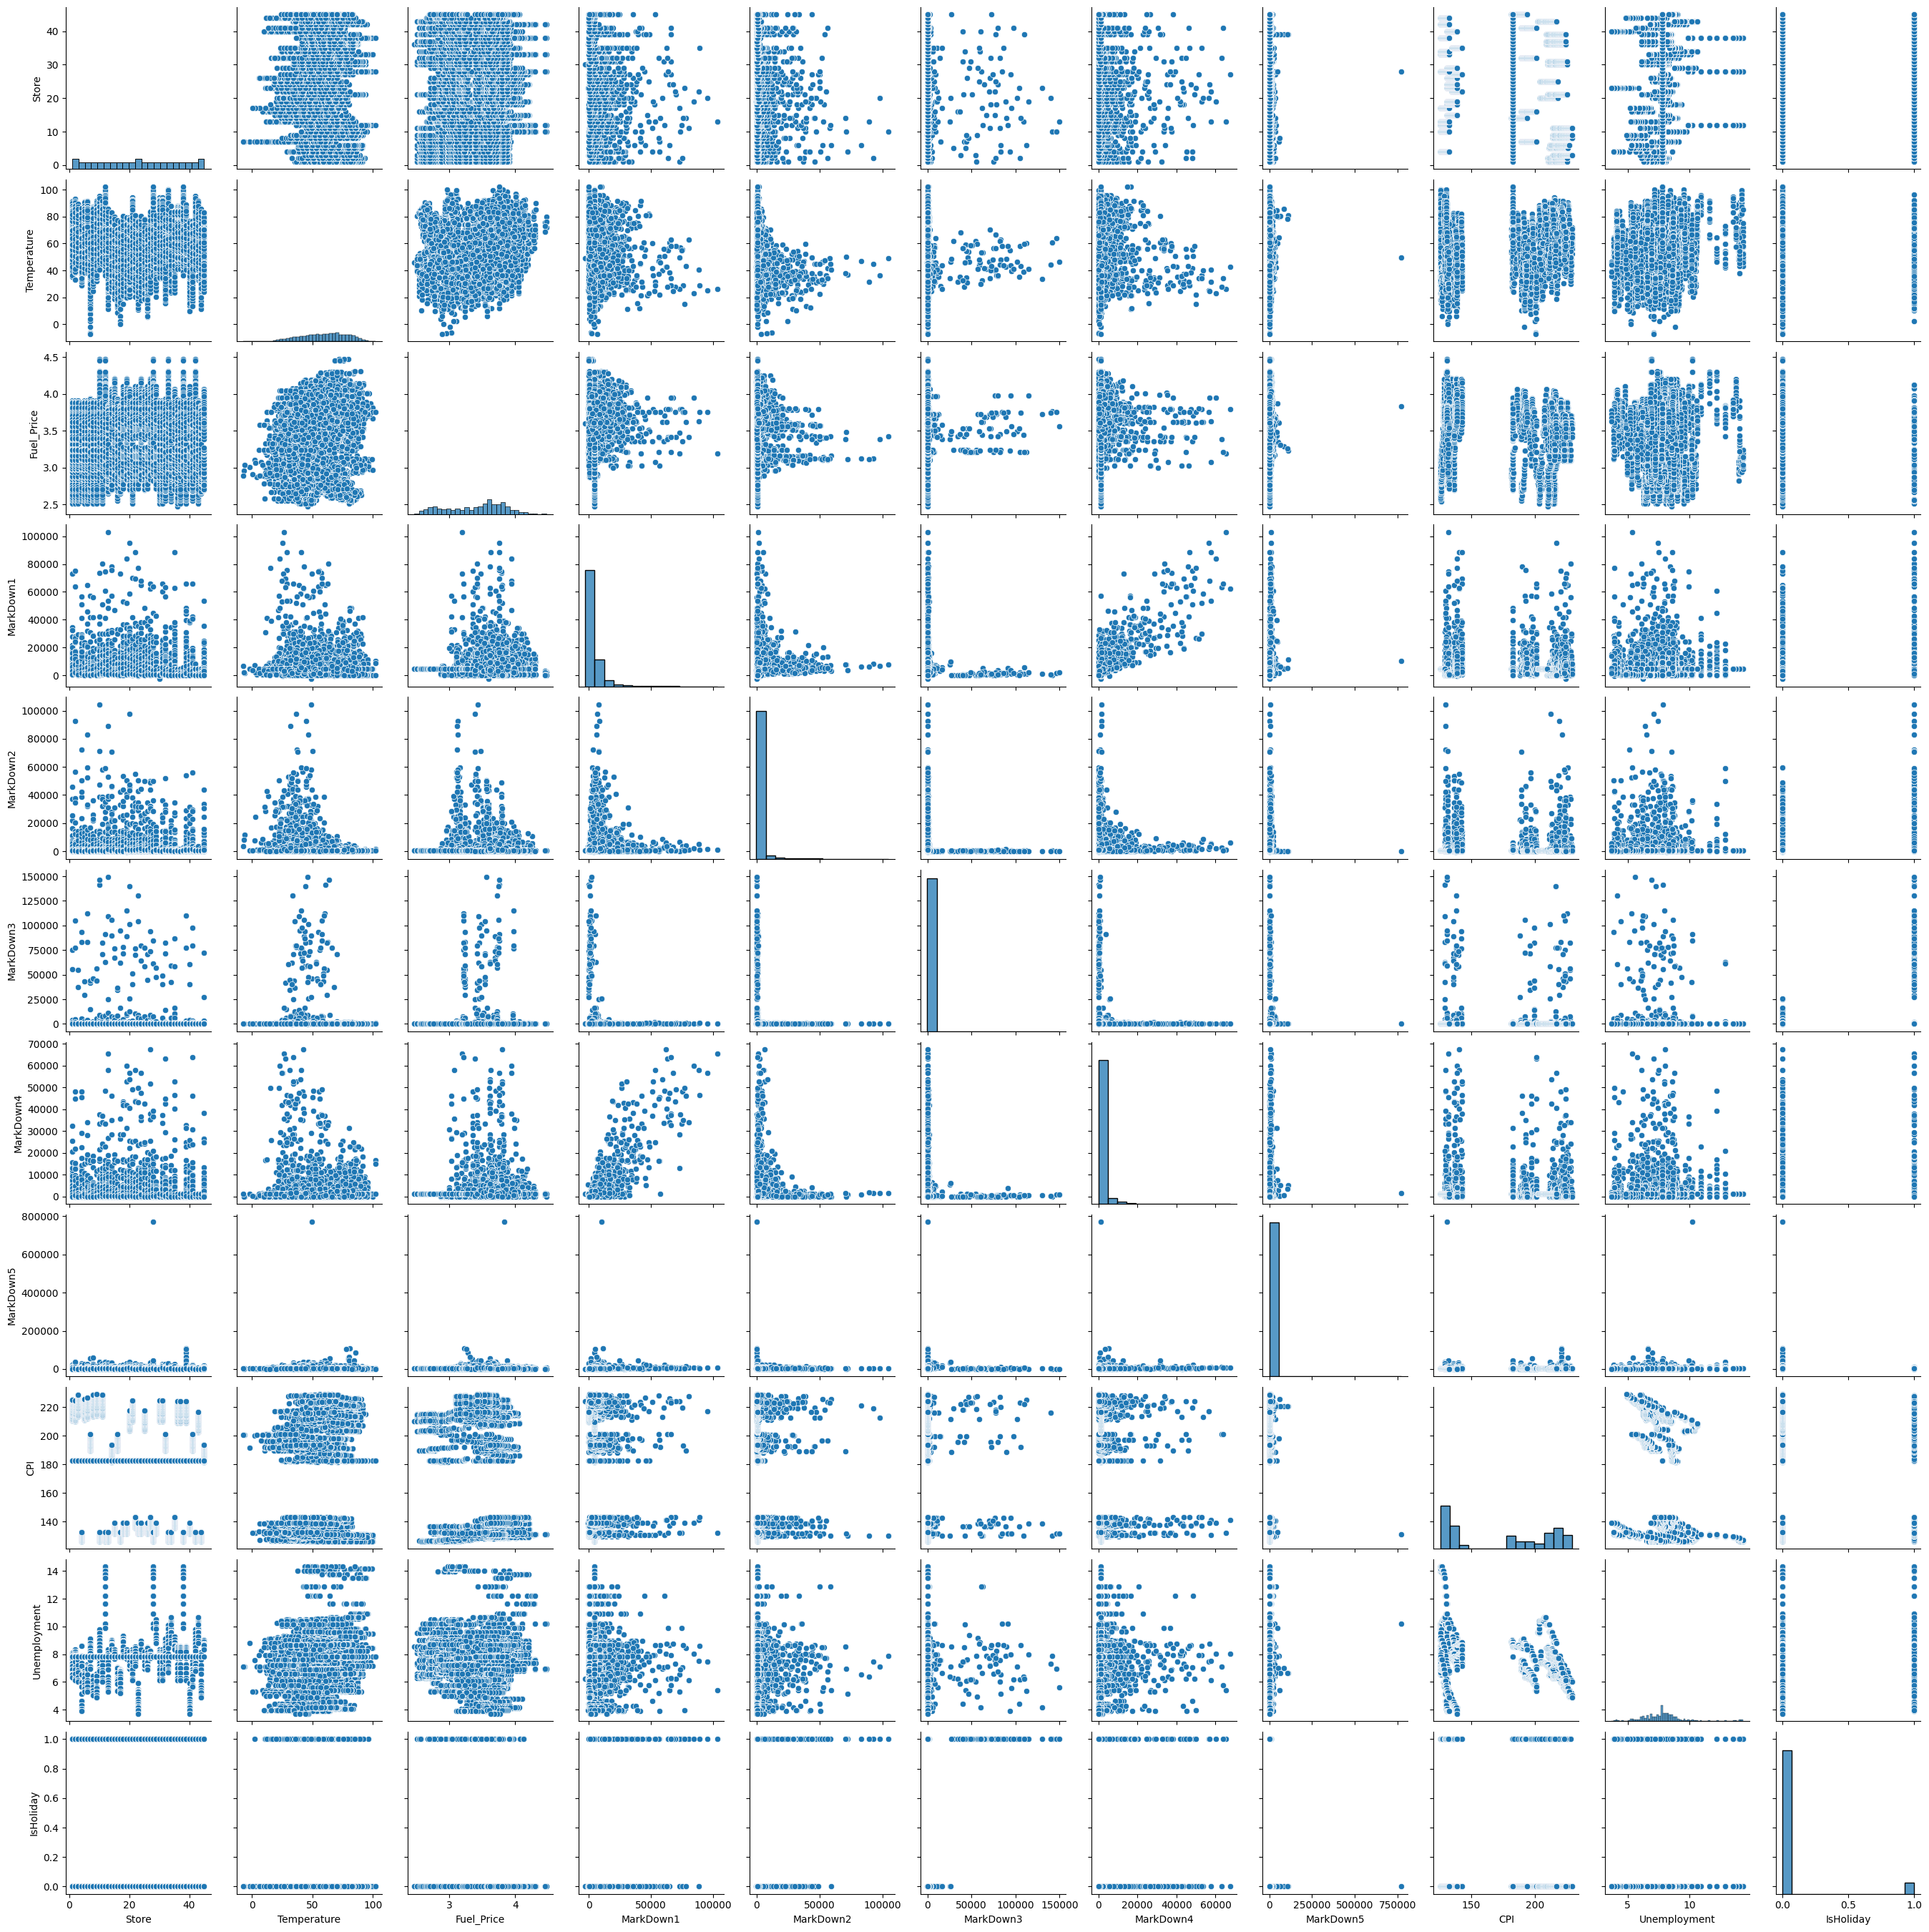

In [75]:
sns.pairplot(features)

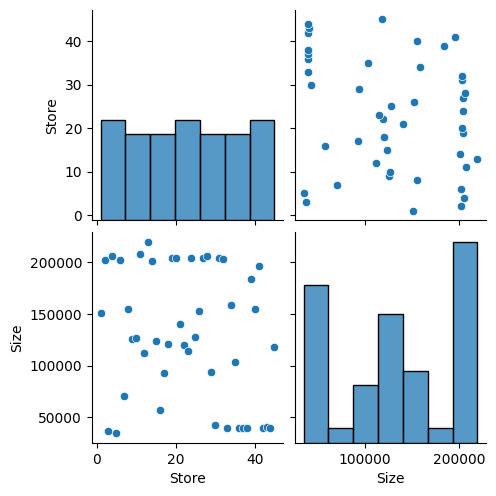

In [76]:
sns.pairplot(stores)

<ipython-input-77-425e967b5c47>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot =True,)


<Axes: >

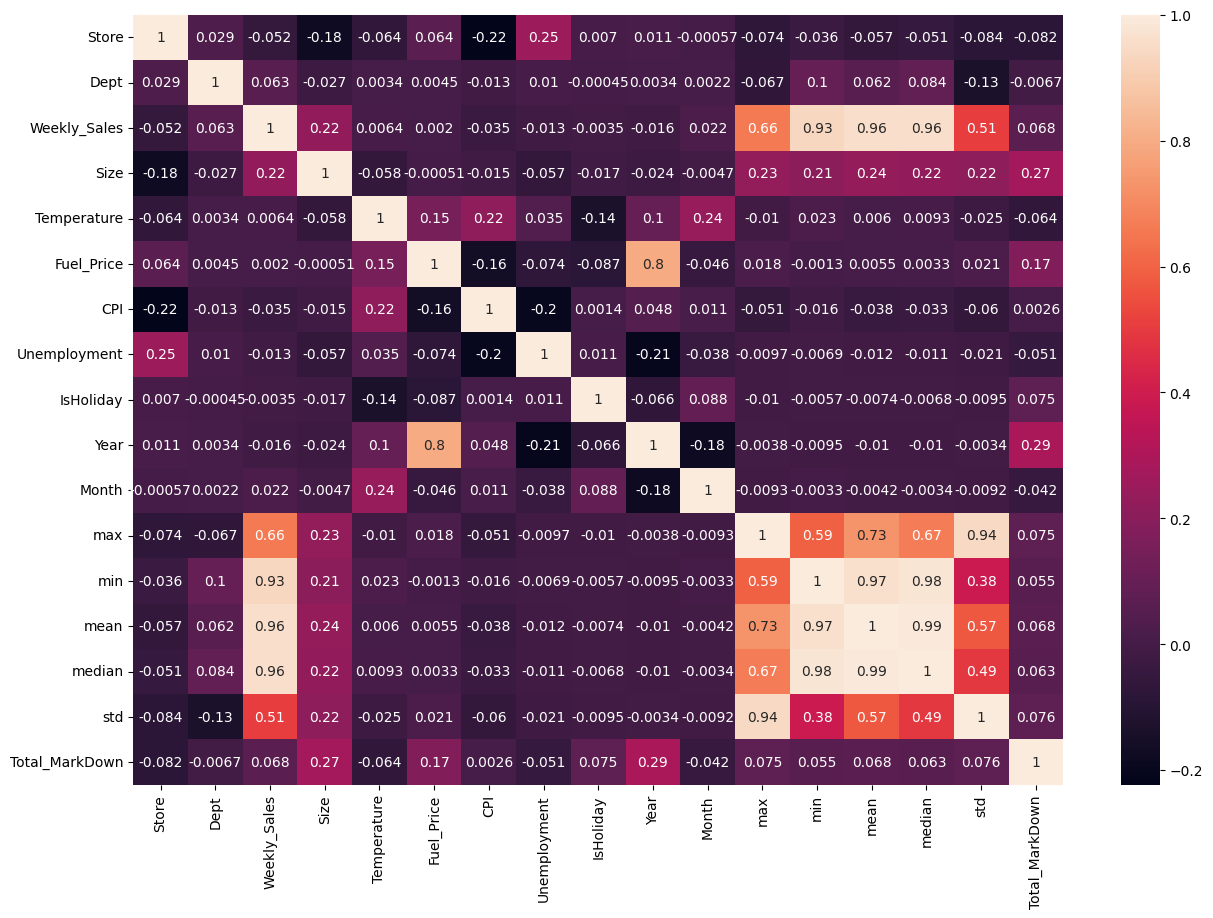

In [77]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot =True,)

<ipython-input-78-fb8bad81c04b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(features.corr(),annot =True,)


<Axes: >

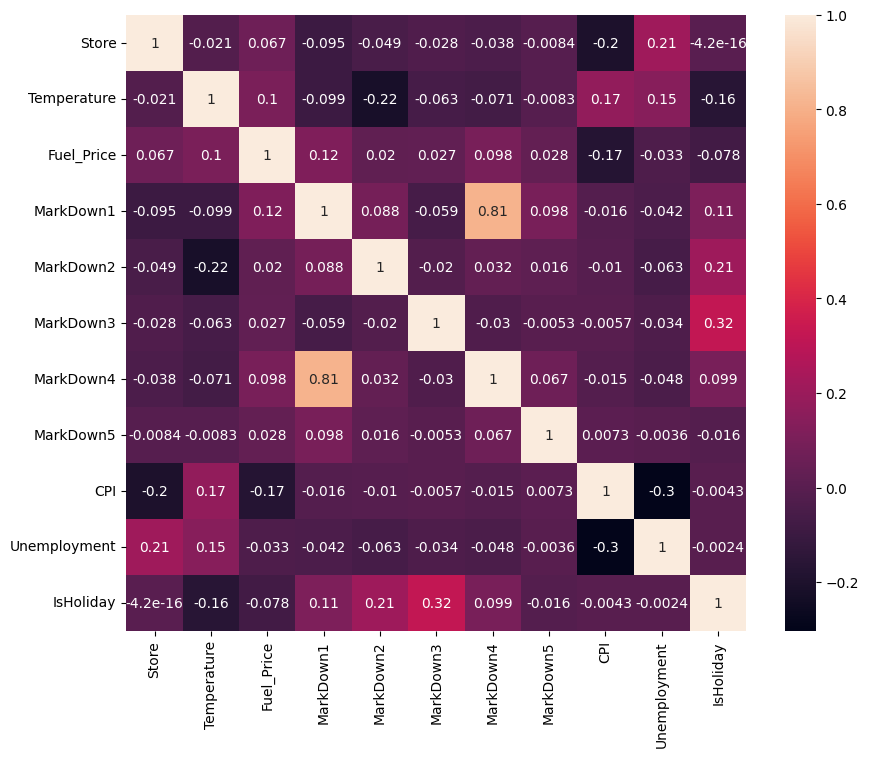

In [78]:
plt.figure(figsize=(10,8))
sns.heatmap(features.corr(),annot =True,)

<ipython-input-79-ae34c300d5d3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(stores.corr(),annot =True,)


<Axes: >

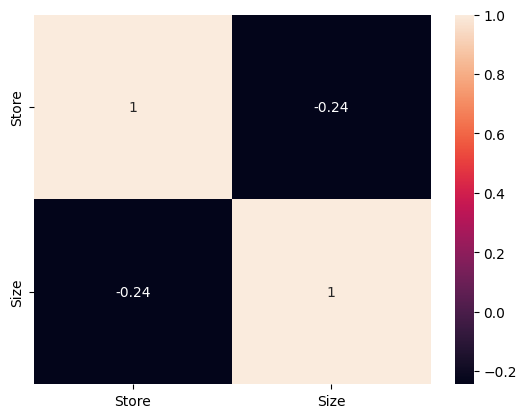

In [79]:
sns.heatmap(stores.corr(),annot =True,)

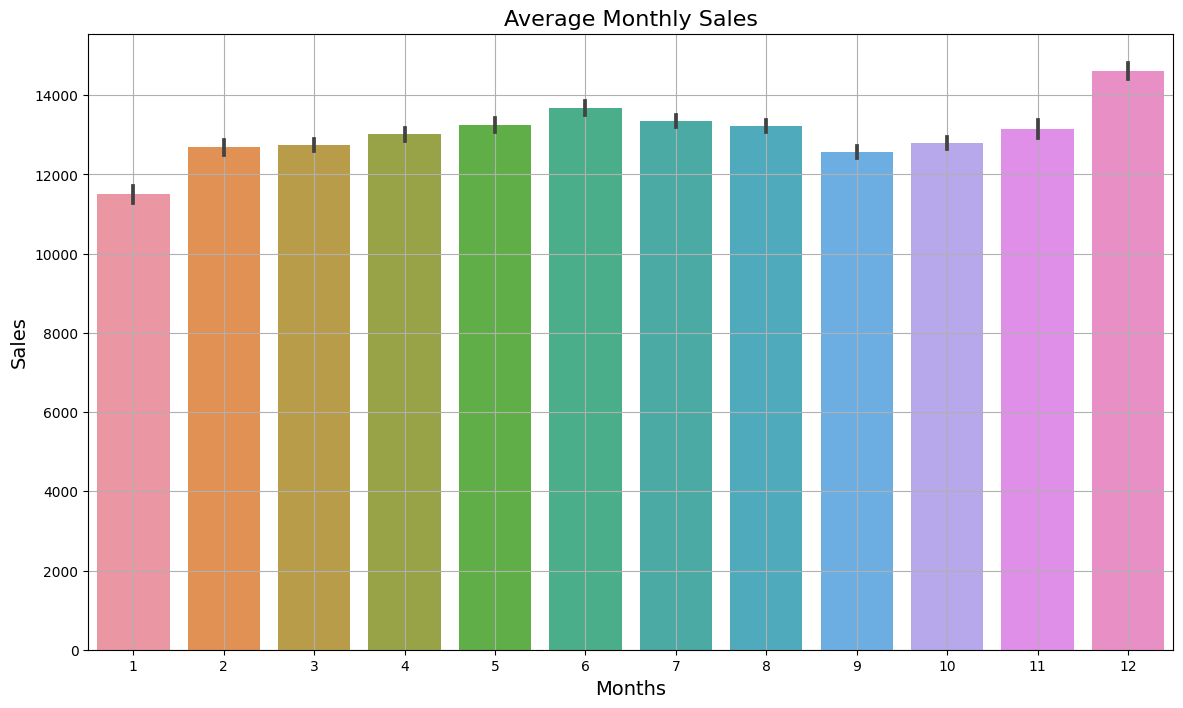

In [80]:
plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',data=data)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
plt.grid()

In [81]:
data_monthly = pd.crosstab(data["Year"], data["Month"], values=data["Weekly_Sales"],aggfunc='sum')
data_monthly

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,NaN,1.365986e+08,1.369976e+08,1.753251e+08,1.422677e+08,1.455770e+08,1.776954e+08,1.426176e+08,1.344151e+08,1.687452e+08,1.440445e+08,1.927286e+08
2011,1.170809e+08,1.320987e+08,1.341586e+08,1.710181e+08,1.382097e+08,1.441182e+08,1.762046e+08,1.398143e+08,1.668033e+08,1.375280e+08,1.034907e+08,1.597524e+08
2012,1.172222e+08,9.035255e+07,1.734250e+08,1.479222e+08,1.512280e+08,1.902330e+08,1.458221e+08,1.636039e+08,1.432228e+08,1.480537e+08,NaN,NaN


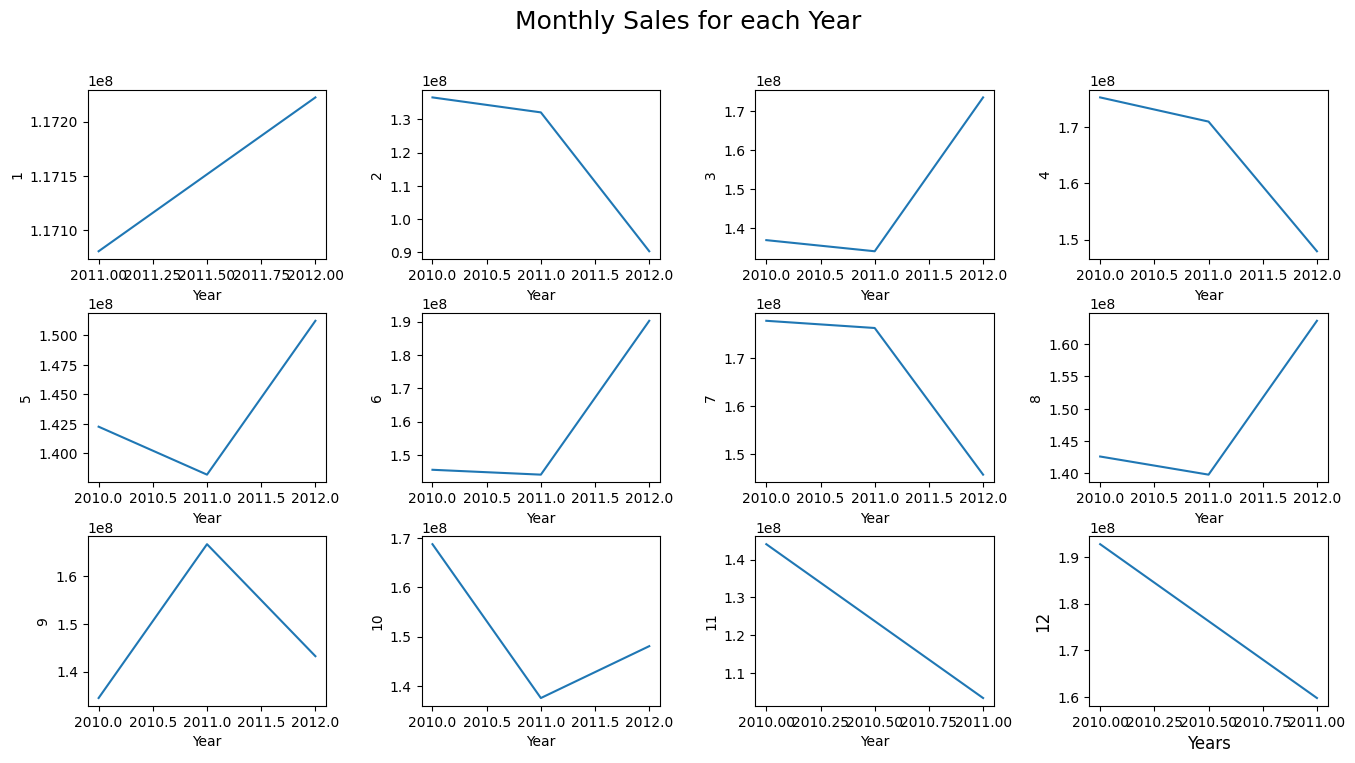

In [82]:
fig, axes = plt.subplots(3,4,figsize=(16,8))
plt.suptitle('Monthly Sales for each Year', fontsize=18)
k=1
for i in range(3):
    for j in range(4):
      sns.lineplot(ax=axes[i,j],data=data_monthly[k])
      plt.subplots_adjust(wspace=0.4,hspace=0.32)
      plt.ylabel(k,fontsize=12)
      plt.xlabel('Years',fontsize=12)
      k+=1

plt.show()

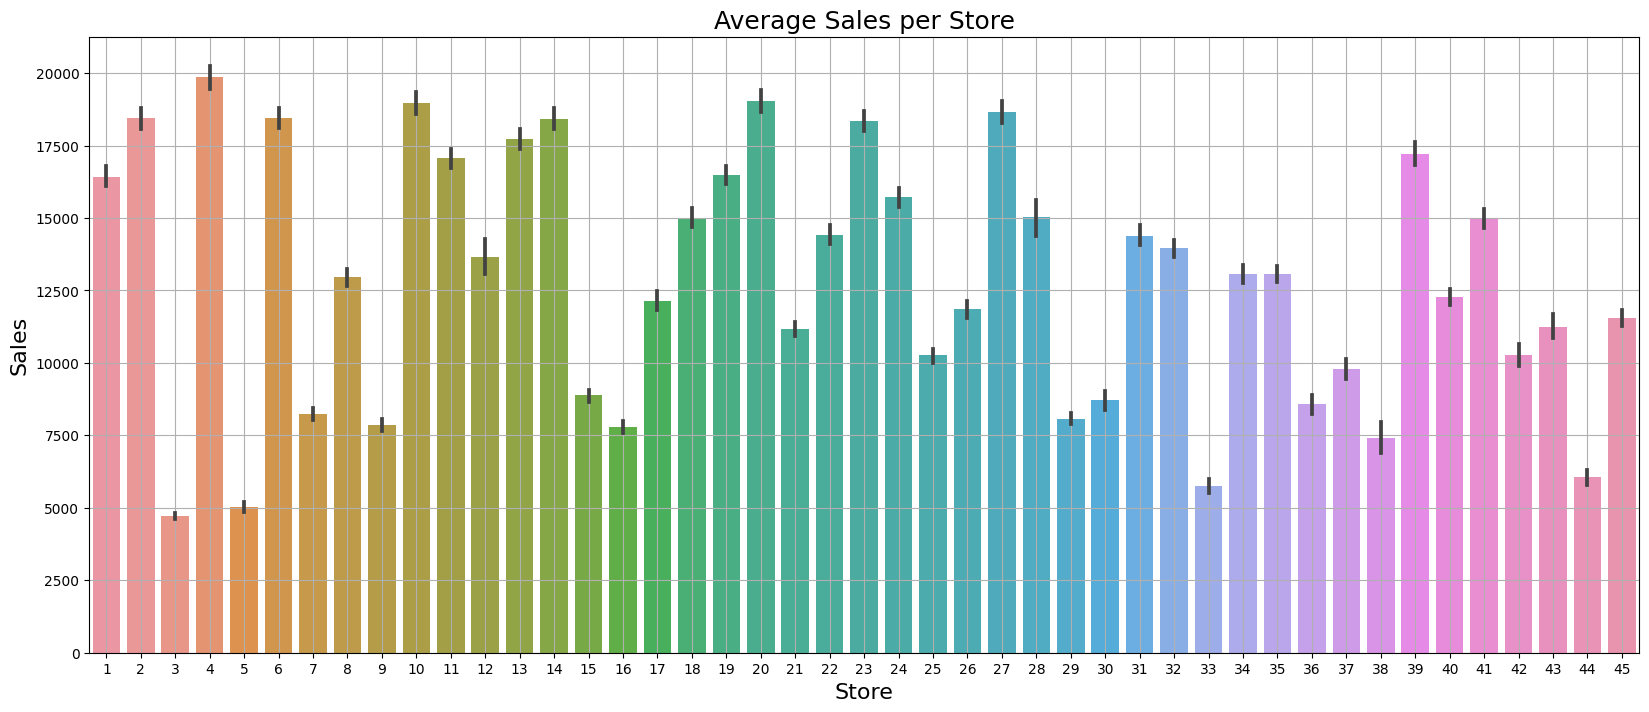

In [83]:
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

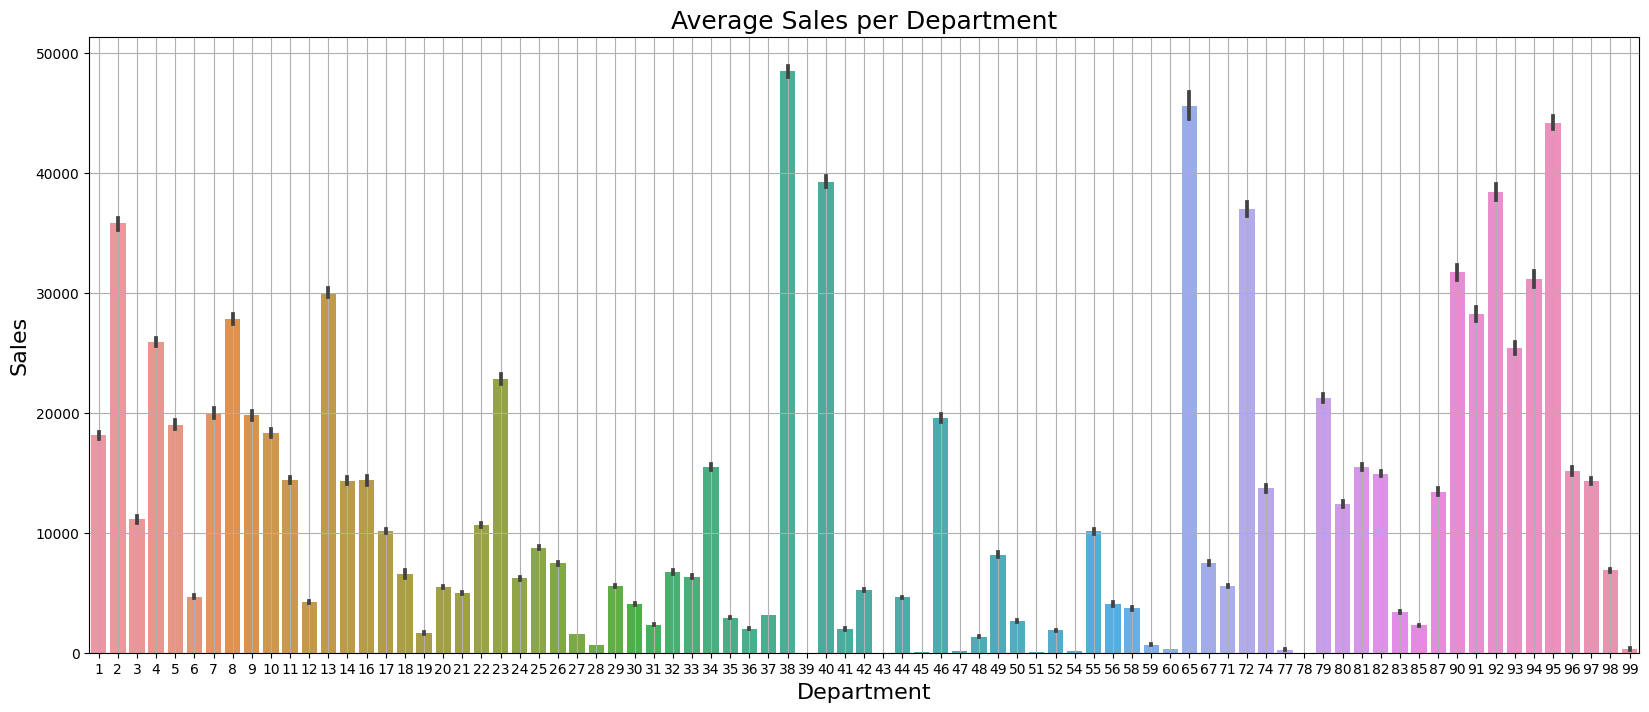

In [84]:
plt.figure(figsize=(20,8))
sns.barplot(x='Dept',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Department', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Department', fontsize=16)
plt.show()

<ipython-input-85-6fa06d0c5fa6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Temperature'])


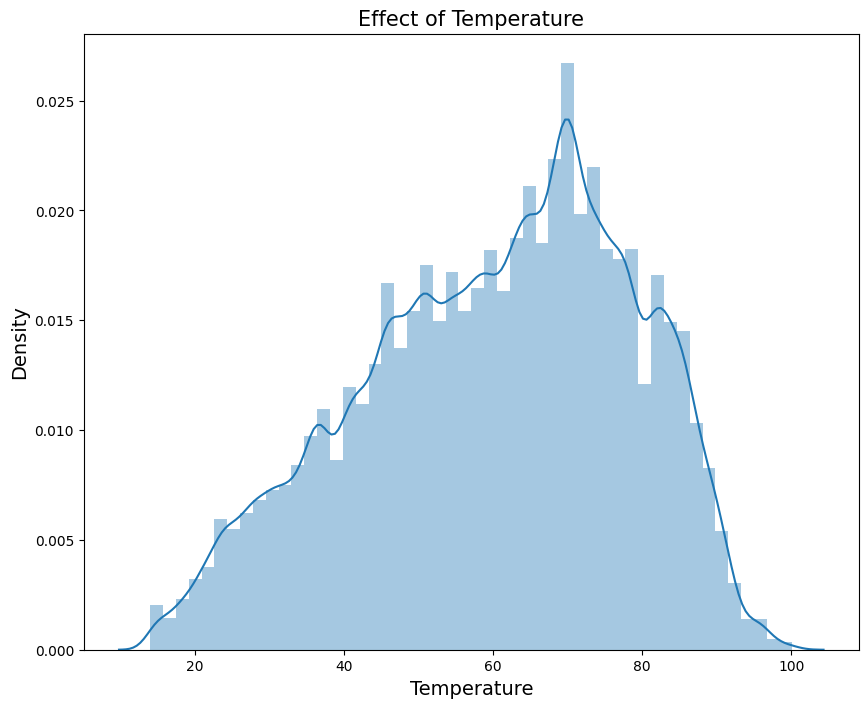

In [85]:
plt.figure(figsize=(10,8))
sns.distplot(data['Temperature'])
plt.title('Effect of Temperature',fontsize=15)
plt.xlabel('Temperature',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.show()

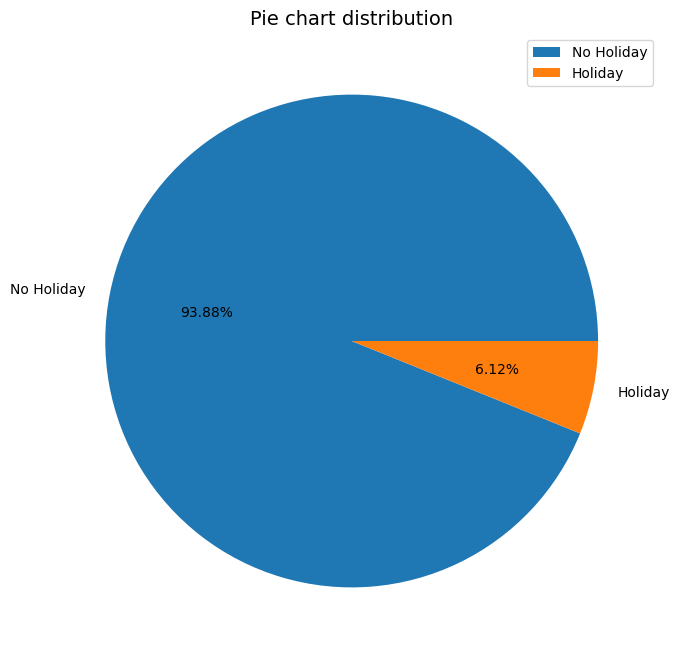

In [86]:
plt.figure(figsize=(8,8))
plt.pie(data['IsHoliday'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=14)
plt.legend()
plt.show()

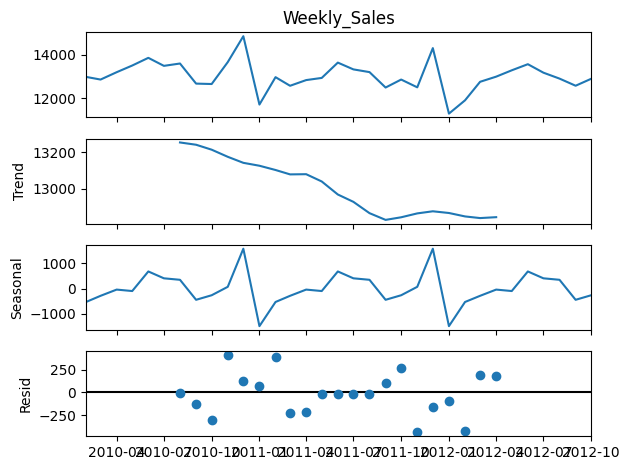

In [87]:
sm.tsa.seasonal_decompose(data['Weekly_Sales'].resample('MS').mean(), model='additive').plot()
plt.show()

##Label encoding

In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [89]:
data.IsHoliday = le.fit_transform(data.IsHoliday)

In [90]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,57592.12,14537.37,22513.322937,18535.48,9854.349032,9047.97
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,766.93,-9.92,372.655556,371.05,290.954675,9047.97
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,2512.14,110.56,876.629441,824.04,307.436056,9047.97
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,214.471451,6.299,0,2010,2,11990.43,7414.43,9188.915105,9161.97,756.223236,9047.97
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,29166.26,4791.74,8607.050490,7571.60,3874.176095,9047.97


In [91]:
data.corr()

<ipython-input-91-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,max,min,mean,median,std,Total_MarkDown
Store,1.000000,0.029279,-0.051564,-0.178963,-0.064168,0.064298,-0.223150,0.251018,0.007004,0.011459,-0.000568,-0.073579,-0.035610,-0.056787,-0.050666,-0.084179,-0.081867
Dept,0.029279,1.000000,0.063098,-0.026696,0.003355,0.004509,-0.012875,0.010319,-0.000451,0.003354,0.002219,-0.066857,0.100522,0.061592,0.084134,-0.133299,-0.006746
Weekly_Sales,-0.051564,0.063098,1.000000,0.224915,0.006377,0.001952,-0.034963,-0.013485,-0.003463,-0.015943,0.021632,0.659415,0.934117,0.958258,0.958044,0.505756,0.068165
Size,-0.178963,-0.026696,0.224915,1.000000,-0.057992,-0.000514,-0.014908,-0.056964,-0.017226,-0.024359,-0.004658,0.227243,0.209495,0.235178,0.223239,0.216185,0.272301
Temperature,-0.064168,0.003355,0.006377,-0.057992,1.000000,0.145995,0.218099,0.035349,-0.135327,0.099587,0.240175,-0.010389,0.022774,0.005981,0.009271,-0.025450,-0.063907
Fuel_Price,0.064298,0.004509,0.001952,-0.000514,0.145995,1.000000,-0.163518,-0.074442,-0.087172,0.796877,-0.045886,0.018311,-0.001346,0.005493,0.003323,0.020933,0.173701
CPI,-0.223150,-0.012875,-0.034963,-0.014908,0.218099,-0.163518,1.000000,-0.200775,0.001436,0.048461,0.011460,-0.051179,-0.015548,-0.037803,-0.032768,-0.060173,0.002566
Unemployment,0.251018,0.010319,-0.013485,-0.056964,0.035349,-0.074442,-0.200775,1.000000,0.010674,-0.208731,-0.038277,-0.009745,-0.006854,-0.012206,-0.011126,-0.020743,-0.050788
IsHoliday,0.007004,-0.000451,-0.003463,-0.017226,-0.135327,-0.087172,0.001436,0.010674,1.000000,-0.065870,0.087778,-0.010412,-0.005705,-0.007399,-0.006839,-0.009529,0.074818
Year,0.011459,0.003354,-0.015943,-0.024359,0.099587,0.796877,0.048461,-0.208731,-0.065870,1.000000,-0.182355,-0.003819,-0.009504,-0.010215,-0.010451,-0.003437,0.294584


In [92]:
data.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,max,min,mean,median,std,Total_MarkDown
count,374316.000000,374316.000000,374316.000000,374316.000000,374316.000000,374316.000000,374316.000000,374316.000000,374316.000000,374316.000000,374316.000000,374316.000000,374316.000000,374316.000000,374316.000000,374316.000000,374316.000000
mean,22.299474,43.421329,13059.487868,134646.993150,60.235654,3.354454,173.416673,7.694918,0.061200,2010.968893,6.436989,30523.567666,8428.973240,13347.294425,12563.723891,3593.129989,10759.260171
std,12.918142,30.087714,15417.571488,60800.902038,18.115503,0.466541,38.917893,1.391183,0.239696,0.802771,3.181141,42046.932613,11364.337141,15474.798056,15033.229864,5243.992945,6231.116470
min,1.000000,1.000000,0.000000,34875.000000,14.020000,2.472000,126.064000,3.879000,0.000000,2010.000000,1.000000,0.020000,-4988.940000,-116.454545,-143.000000,0.000000,567.350000
25%,11.000000,18.000000,1980.000000,93188.000000,47.130000,2.891000,132.756800,6.858000,0.000000,2010.000000,4.000000,5794.330000,675.000000,2308.411818,2017.000000,731.571412,9047.970000
50%,22.000000,36.000000,7102.300000,128107.000000,62.490000,3.462000,188.797935,7.838000,0.000000,2011.000000,6.000000,17294.460000,3847.950000,7534.953916,6856.100000,1880.958217,9047.970000
75%,33.000000,72.000000,18254.095000,202307.000000,74.220000,3.738000,213.178695,8.512000,0.000000,2012.000000,9.000000,41082.450000,11424.500000,18687.708252,17317.790000,4263.309723,9047.970000
max,45.000000,99.000000,72756.180000,219622.000000,100.140000,4.468000,227.232807,12.187000,1.000000,2012.000000,12.000000,649770.180000,72028.740000,108598.364126,107690.800000,71265.927075,43877.350000


##Data Splitted into Training, Validation, Test

In [93]:
X = data.drop(['Weekly_Sales'],axis=1)
Y = data.Weekly_Sales

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 374316 entries, 2010-02-05 to 2012-10-26
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Store           374316 non-null  int64         
 1   Dept            374316 non-null  int64         
 2   Date            374316 non-null  datetime64[ns]
 3   Weekly_Sales    374316 non-null  float64       
 4   Type            374316 non-null  object        
 5   Size            374316 non-null  int64         
 6   Temperature     374316 non-null  float64       
 7   Fuel_Price      374316 non-null  float64       
 8   CPI             374316 non-null  float64       
 9   Unemployment    374316 non-null  float64       
 10  IsHoliday       374316 non-null  int64         
 11  Year            374316 non-null  int64         
 12  Month           374316 non-null  int64         
 13  max             374316 non-null  float64       
 14  min             3743

In [95]:
X=X[["Store","Dept","Size","Temperature","IsHoliday","Year",'Month']]

In [96]:
y = y.values.reshape(-1,1)

In [97]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

##Random Forest Model

In [98]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [99]:
rf_acc = rf.score(X_test,y_test)*100
print("Random Forest Regressor Accuracy - ",rf_acc)

Random Forest Regressor Accuracy -  96.717728019049


In [100]:
y_pred = rf.predict(X_test)

In [101]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 1347.057103404645
MSE 7762533.910007549
RMSE 2786.1324286558147
R2 0.9671799132436019


In [102]:
rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_df

,Actual,Predicted
Date,,
2010-11-05,3337.16,3101.4195
2012-02-24,2750.32,2367.4168
2011-05-27,24468.54,28617.4819
2011-12-02,4290.05,4913.6240
2010-10-22,62810.47,65452.5152
...,...,...
2011-02-11,3758.30,4464.5859
2011-07-29,44.00,38.0155
2011-03-04,15667.37,13011.0442


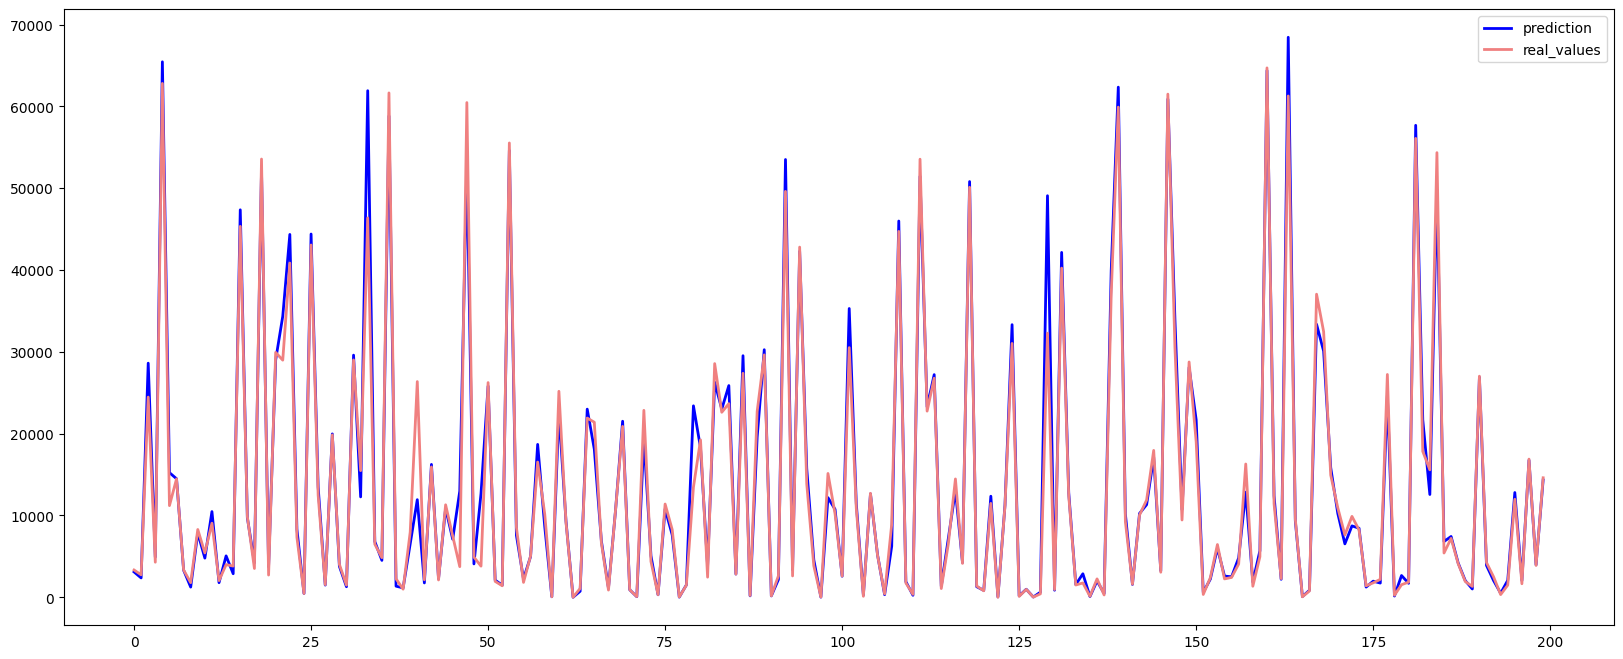

In [103]:
plt.figure(figsize=(20,8))
plt.plot(rf.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

In [104]:
pickle.dump(rf,open('random_forest.pkl','wb'))

##XGBoost Model

In [105]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [106]:
xgb_acc = xgbr.score(X_test,y_test)*100
print("XGBoost Regressor Accuracy - ",xgb_acc)

XGBoost Regressor Accuracy -  93.55304433359376


In [107]:
y_pred = xgbr.predict(X_test)

In [108]:
xgb_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
xgb_df

,Actual,Predicted
Date,,
2010-11-05,3337.16,2188.607178
2012-02-24,2750.32,1996.927734
2011-05-27,24468.54,27683.222656
2011-12-02,4290.05,5565.678711
2010-10-22,62810.47,61778.828125
...,...,...
2011-02-11,3758.30,7095.057129
2011-07-29,44.00,-21.993582
2011-03-04,15667.37,6237.420898


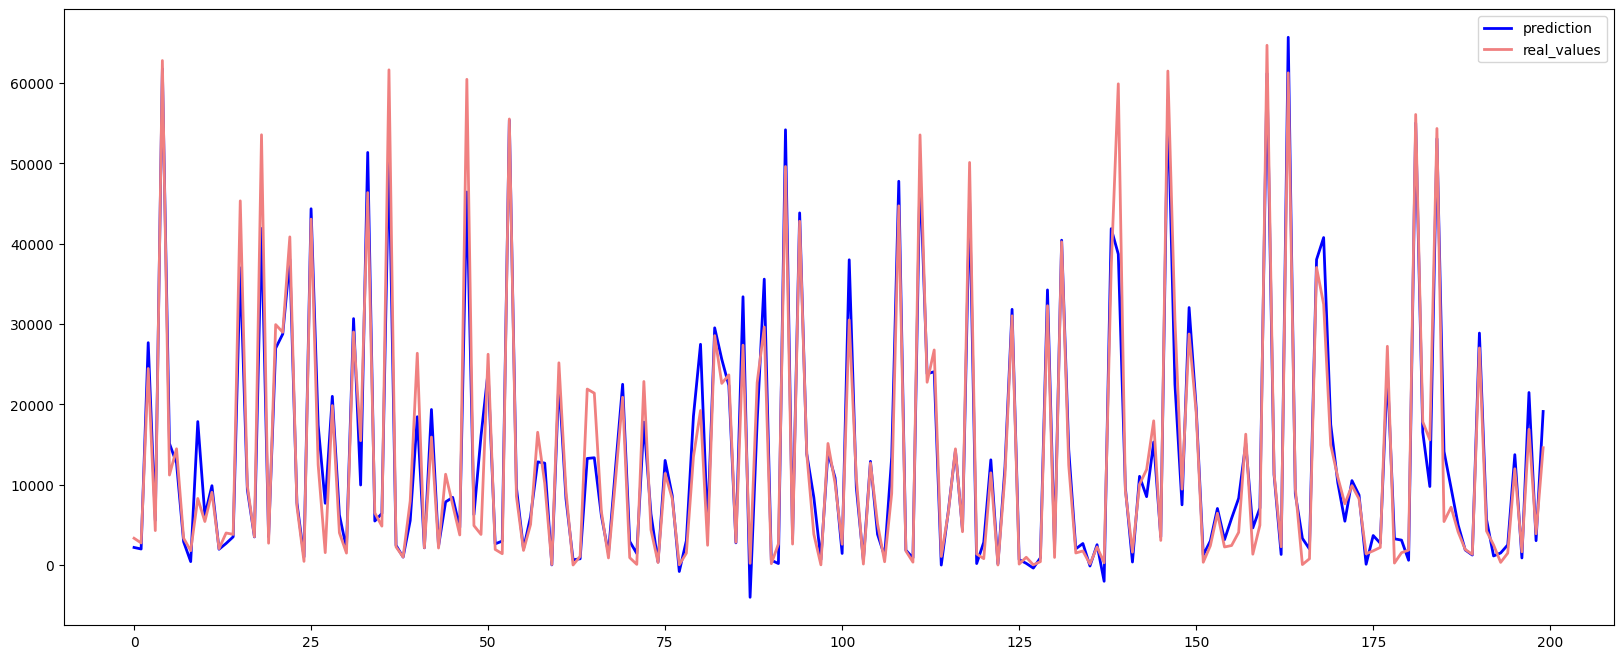

In [109]:
plt.figure(figsize=(20,8))
plt.plot(xgbr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()


In [110]:
pickle.dump(xgbr,open('xgboost.pkl','wb'))

##Comparing Models

In [111]:
acc = {'model':['randomforest','xgboost'],'accuracy':[rf_acc,xgb_acc]}

In [112]:
acc_df = pd.DataFrame(acc)
acc_df

,model,accuracy
0,randomforest,96.717728
1,xgboost,93.553044


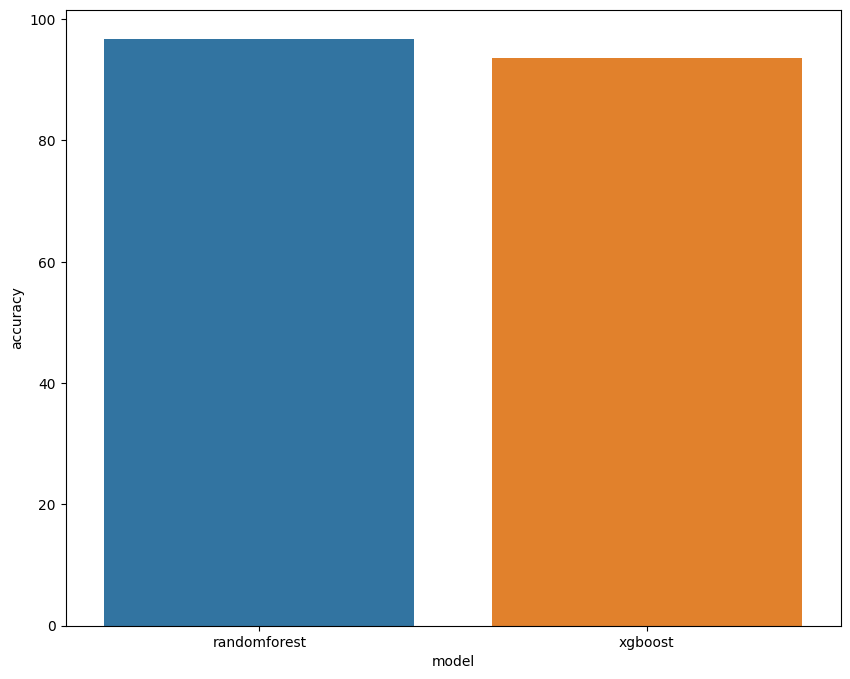

In [113]:
plt.figure(figsize=(10,8))
sns.barplot(x='model',y='accuracy',data=acc_df)
plt.show()